## Titanic Dataset Analysis from Kaggle
data : [link to titanic dataset at Kaggle](https://www.kaggle.com/competitions/titanic/data?select=test.csv)

In [1]:
import pandas as pd

In [2]:
## Dataset Reading
train_data = pd.read_csv('../kaggle_datasets/titanic_train.csv')
test_data = pd.read_csv('../kaggle_datasets/titanic_test.csv')

Verifying data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Verifying NaN values, and data types

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


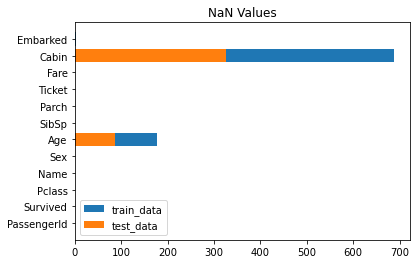

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('NaN Values')
plt.barh(y=train_data.columns, data=train_data, width=train_data.isna().sum(),label='train_data')
plt.barh(y=test_data.columns, data=test_data, width=test_data.isna().sum(),label='test_data')
plt.legend()

## I chose to drop NaN values from Age because if I replace it with any value it can give bias to the dataset, and drop the column Cabin because it have more than 75% of NaN values.

In [8]:
train_data_clean = train_data.drop(columns='Cabin')
test_data_clean = test_data.drop(columns='Cabin')

In [9]:
train_data_clean = train_data_clean.dropna()
test_data_clean = train_data_clean.dropna()

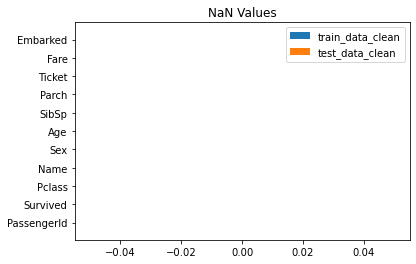

In [10]:
plt.title('NaN Values')
plt.barh(y=train_data_clean.columns, 
         data=train_data_clean, 
         width=train_data_clean.isna().sum(),
         label='train_data_clean')
plt.barh(y=test_data_clean.columns, 
         data=test_data_clean, 
         width=test_data_clean.isna().sum(),
         label='test_data_clean')
plt.legend()

## Looking for correlations, and data statistics

In [11]:
train_data_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [12]:
test_data_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


<AxesSubplot:>

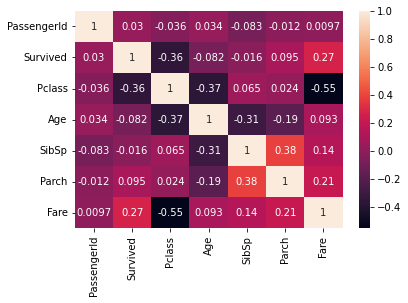

In [13]:
import numpy as np
sns.heatmap(data=train_data_clean.select_dtypes(np.number).corr(), annot=True)

In [14]:
train_data_clean.select_dtypes(np.number).corr().abs().sort_values(by='Survived')['Survived']

# Pclass, and Fare are the features that is more correlated to the target.
# Those targets are related to how much money the passenger have.

SibSp          0.015523
PassengerId    0.029526
Age            0.082446
Parch          0.095265
Fare           0.266100
Pclass         0.356462
Survived       1.000000
Name: Survived, dtype: float64

## Verifying Pclass with Age, SibSp and Parch influence over the target, and others EDA

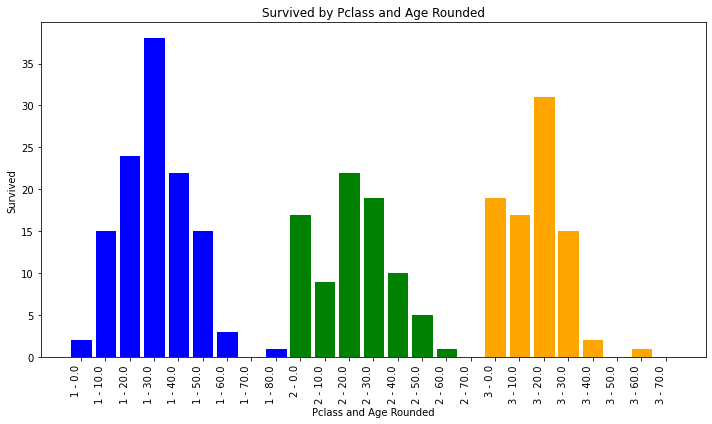

In [15]:
# Rounding Age column

train_data_clean['Age_Rounded'] = (train_data_clean['Age'] // 10) * 10

# Group by Pclass and Age_Rounded, counting target positive values
grouped_data = train_data_clean.groupby(['Pclass', 'Age_Rounded'])['Survived'].sum().reset_index()

class_colors = {1: 'blue', 2: 'green', 3: 'orange'}


plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['Survived'], 
        tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['Age_Rounded'].astype(str))
bars = plt.bar(grouped_data.index, grouped_data['Survived'], tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['Age_Rounded'].astype(str))
legend_labels = []
for i, bar in enumerate(bars):
    pclass = grouped_data.loc[i, 'Pclass']
    bar.set_color(class_colors[pclass])
    if pclass not in legend_labels:
        legend_labels.append(pclass)
plt.xlabel('Pclass and Age Rounded')
plt.ylabel('Survived')
plt.title('Survived by Pclass and Age Rounded')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()


plt.show()



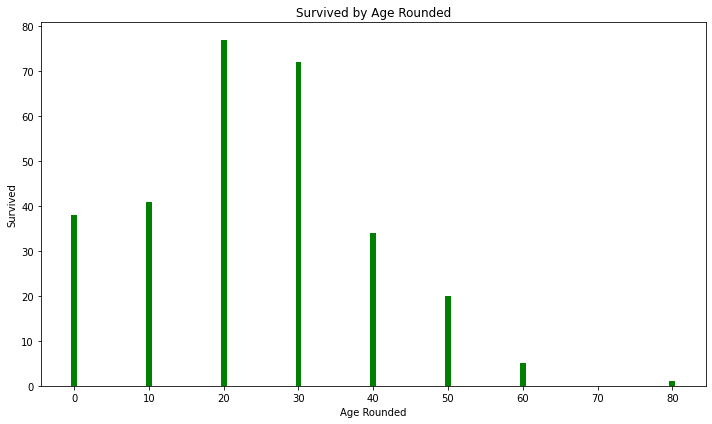

In [16]:
grouped_data = train_data_clean.groupby('Age_Rounded')['Survived'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Age_Rounded'], grouped_data['Survived'], color='green')
plt.xlabel('Age Rounded')
plt.ylabel('Survived')
plt.title('Survived by Age Rounded')
plt.xticks(np.unique(grouped_data['Age_Rounded']))
plt.tight_layout()

plt.show()

# People between 15 and 35 years old were more likely to survive.

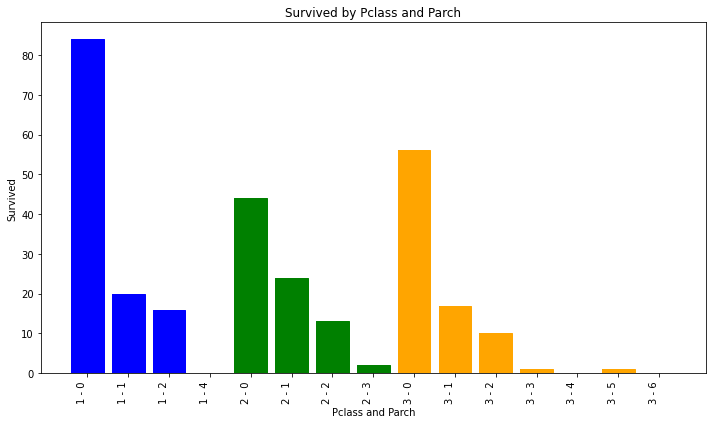

In [17]:
# Group by Pclass and Age_Rounded, counting target positive values
grouped_data = train_data_clean.groupby(['Pclass', 'Parch'])['Survived'].sum().reset_index()

class_colors = {1: 'blue', 2: 'green', 3: 'orange'}


plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['Survived'], 
        tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['Parch'].astype(str))
bars = plt.bar(grouped_data.index, grouped_data['Survived'], tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['Parch'].astype(str))
legend_labels = []
for i, bar in enumerate(bars):
    pclass = grouped_data.loc[i, 'Pclass']
    bar.set_color(class_colors[pclass])
    if pclass not in legend_labels:
        legend_labels.append(pclass)
plt.xlabel('Pclass and Parch')
plt.ylabel('Survived')
plt.title('Survived by Pclass and Parch')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()

# People with Parch=0 were more likely to survive, Pclass wasn't correlated, people.

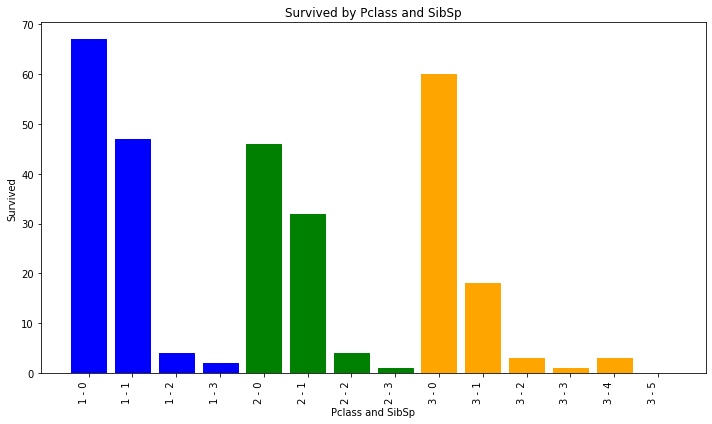

In [18]:
# Group by Pclass and Age_Rounded, counting target positive values
grouped_data = train_data_clean.groupby(['Pclass', 'SibSp'])['Survived'].sum().reset_index()

class_colors = {1: 'blue', 2: 'green', 3: 'orange'}


plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['Survived'], 
        tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['SibSp'].astype(str))
bars = plt.bar(grouped_data.index, grouped_data['Survived'], tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['SibSp'].astype(str))
legend_labels = []
for i, bar in enumerate(bars):
    pclass = grouped_data.loc[i, 'Pclass']
    bar.set_color(class_colors[pclass])
    if pclass not in legend_labels:
        legend_labels.append(pclass)
plt.xlabel('Pclass and SibSp')
plt.ylabel('Survived')
plt.title('Survived by Pclass and SibSp')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()


plt.show()

# People with SibSp=0 were more likely to survive.

In [28]:
train_data_clean.groupby(['Sex'])['Survived'].sum()

# Women were more likely to survive.

Sex
female    195
male       93
Name: Survived, dtype: int64

In [29]:
train_data_clean.groupby(['Pclass'])['Survived'].sum()

# People from 1st class were likely to survive.

Pclass
1    120
2     83
3     85
Name: Survived, dtype: int64